# Forecast Tutorial

This tutorial will walk through forecast data from Unidata forecast model data using the forecast.py module within pvlib.

Table of contents:
1. [Setup](#Setup)
2. [Intialize and Test Each Forecast Model](#Instantiate-GFS-forecast-model)

This tutorial has been tested against the following package versions:
* Python 3.4.3
* IPython 4.0.1
* pandas 0.18.0
* matplotlib 1.5.1
* netcdf4 1.2.1
* siphon 0.3.2

It should work with other Python and Pandas versions. It requires pvlib >= 0.3.0 and IPython >= 3.0.

Authors:
* Derek Groenendyk (@moonraker), University of Arizona, November 2015
* Will Holmgren (@wholmgren), University of Arizona, November 2015, January 2016, April 2016

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set(rc={"figure.figsize": (12, 6)})
except ImportError:
    print('We suggest you install seaborn using conda or pip and rerun this cell')

# built in python modules
import datetime
import os

# python add-ons
import numpy as np
import pandas as pd
try:
    import netCDF4
    from netCDF4 import num2date
except ImportError:
    print('We suggest you install netCDF4 using conda rerun this cell')

# for accessing UNIDATA THREDD servers
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS

import pvlib
from pvlib.forecast import GFS, HRRR_ESRL, NAM, NDFD, HRRR, RAP

In [2]:
# Choose a location and time.
# Tucson, AZ
latitude = 32.2
longitude = -110.9 
tz = 'US/Arizona'

start = pd.Timestamp(datetime.date.today(), tz=tz) # today's date
end = start + pd.Timedelta(days=7) # 7 days from today
print(start, end)

(Timestamp('2016-04-03 00:00:00-0700', tz='US/Arizona'), Timestamp('2016-04-10 00:00:00-0700', tz='US/Arizona'))


## GFS (0.5 deg)

In [3]:
# GFS model, defaults to 0.5 degree resolution
fm = GFS()

In [4]:
# retrieve data
data = fm.get_data(latitude, longitude, start, end)

In [5]:
data

,Downward_Short-Wave_Radiation_Flux_surface_Mixed_intervals_Average,Temperature_surface,Total_cloud_cover_boundary_layer_cloud_Mixed_intervals_Average,Total_cloud_cover_convective_cloud,Total_cloud_cover_entire_atmosphere_Mixed_intervals_Average,Total_cloud_cover_high_cloud_Mixed_intervals_Average,Total_cloud_cover_low_cloud_Mixed_intervals_Average,Total_cloud_cover_middle_cloud_Mixed_intervals_Average,Wind_speed_gust_surface,u-component_of_wind_isobaric,v-component_of_wind_isobaric
2016-04-03 09:00:00-07:00,0.0,284.399994,0.0,0.0,0.0,0.0,0.0,0.0,4.700000,-4.51,1.39
2016-04-03 12:00:00-07:00,0.0,283.000000,0.0,0.0,0.0,0.0,0.0,0.0,5.600000,-4.98,2.62
2016-04-03 15:00:00-07:00,100.0,291.899994,0.0,0.0,0.0,0.0,0.0,0.0,6.300000,-4.51,1.46
2016-04-03 18:00:00-07:00,401.0,309.500000,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,-3.47,0.68
2016-04-03 21:00:00-07:00,990.0,317.799988,0.0,0.0,0.0,0.0,0.0,0.0,1.800000,-0.61,0.15
2016-04-04 00:00:00-07:00,829.0,305.100006,0.0,0.0,0.0,0.0,0.0,0.0,2.500000,0.47,-1.77
2016-04-04 03:00:00-07:00,90.0,290.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.400000,-1.01,-2.22
2016-04-04 06:00:00-07:00,45.0,286.700012,0.0,0.0,0.0,0.0,0.0,0.0,1.400000,0.62,-1.23
2016-04-04 09:00:00-07:00,0.0,284.700012,0.0,0.0,0.0,0.0,0.0,0.0,1.800000,-1.76,-0.51
2016-04-04 12:00:00-07:00,0.0,283.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,-1.71,1.10


In [6]:
data = fm.process_data(data)

In [7]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

In [8]:
data

,temperature,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2016-04-03 09:00:00-07:00,11.250000,4.719343,569.712283,829.668309,92.683744,0.0,0.0,0.0,0.0
2016-04-03 12:00:00-07:00,9.850006,5.627148,980.540706,989.349943,100.748999,0.0,0.0,0.0,0.0
2016-04-03 15:00:00-07:00,18.750000,4.740433,749.436252,913.979997,97.013280,0.0,0.0,0.0,0.0
2016-04-03 18:00:00-07:00,36.350006,3.536001,86.669267,223.879685,52.436825,0.0,0.0,0.0,0.0
2016-04-03 21:00:00-07:00,44.649994,0.628172,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-04-04 00:00:00-07:00,31.950012,1.831338,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-04-04 03:00:00-07:00,16.850006,2.438955,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-04-04 06:00:00-07:00,13.550018,1.377425,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-04-04 09:00:00-07:00,11.550018,1.832403,574.824061,832.516507,92.832874,0.0,0.0,0.0,0.0
2016-04-04 12:00:00-07:00,9.850006,2.033249,984.610605,990.448411,100.802616,0.0,0.0,0.0,0.0


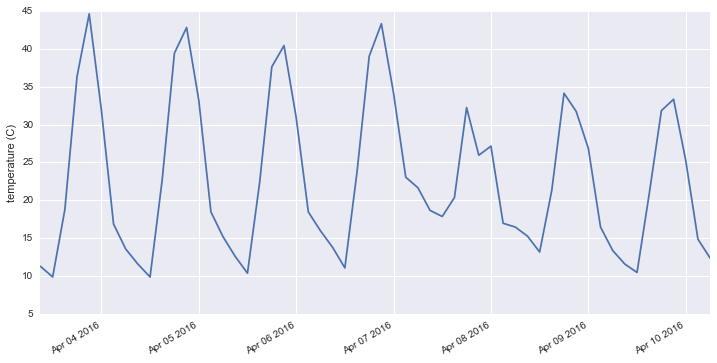

In [9]:
data['temperature'].plot()
plt.ylabel('temperature (%s)' % fm.units['temperature'])

In [10]:
cloud_vars = ['total_clouds', 'low_clouds', 'mid_clouds', 'high_clouds']

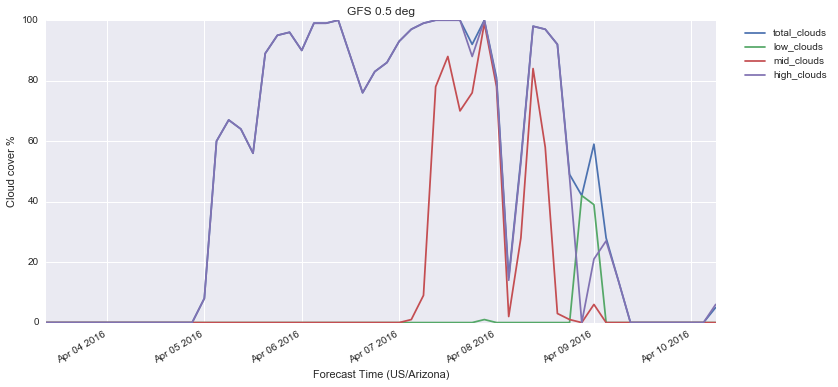

In [11]:
for varname in cloud_vars:
    data[varname].plot()
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.5 deg')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [12]:
total_cloud_cover = data['total_clouds']

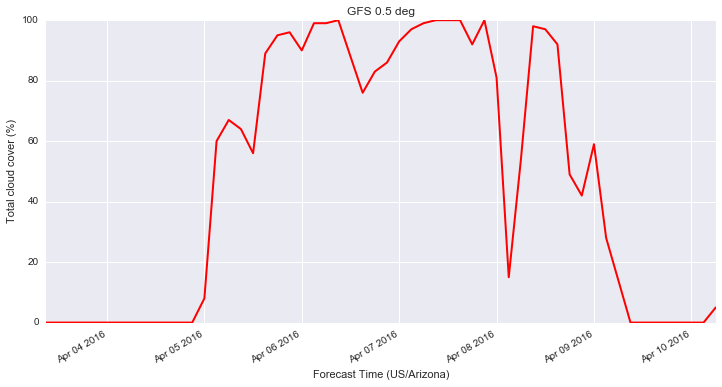

In [13]:
total_cloud_cover.plot(color='r', linewidth=2)
plt.ylabel('Total cloud cover' + ' (%s)' % fm.units['total_clouds'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.5 deg')

## GFS (0.25 deg)

In [14]:
# GFS model at 0.25 degree resolution
fm = GFS(resolution='quarter')

In [15]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

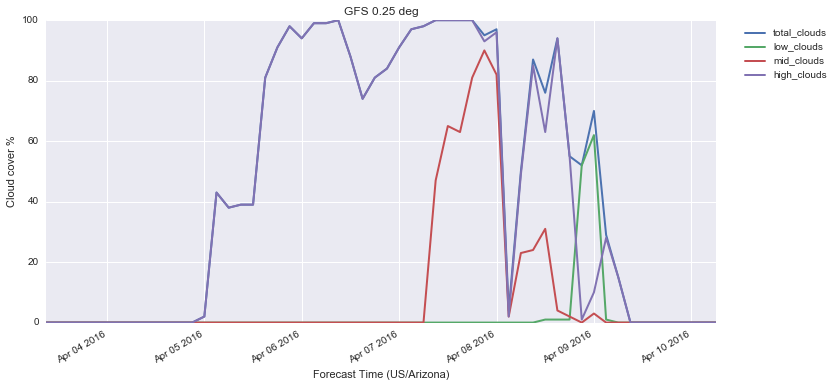

In [16]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.25 deg')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [17]:
data

,temperature,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2016-04-03 09:00:00-07:00,12.050018,5.031501,569.712283,829.668309,92.683744,0.0,0.0,0.0,0.0
2016-04-03 12:00:00-07:00,10.850006,5.904075,980.540706,989.349943,100.748999,0.0,0.0,0.0,0.0
2016-04-03 15:00:00-07:00,19.250000,4.729503,749.436252,913.979997,97.013280,0.0,0.0,0.0,0.0
2016-04-03 18:00:00-07:00,35.950012,3.047261,86.669267,223.879685,52.436825,0.0,0.0,0.0,0.0
2016-04-03 21:00:00-07:00,40.149994,1.516047,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-04-04 00:00:00-07:00,31.450012,1.078378,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-04-04 03:00:00-07:00,15.850006,2.245907,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-04-04 06:00:00-07:00,13.149994,1.204159,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-04-04 09:00:00-07:00,11.350006,2.067124,574.824061,832.516507,92.832874,0.0,0.0,0.0,0.0
2016-04-04 12:00:00-07:00,9.750000,2.182842,984.610605,990.448411,100.802616,0.0,0.0,0.0,0.0


## NAM

In [18]:
fm = NAM()

In [19]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

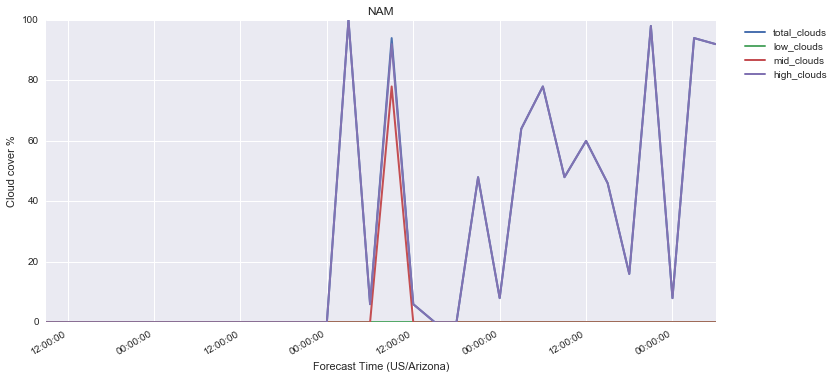

In [20]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('NAM')
plt.legend(bbox_to_anchor=(1.18,1.0))

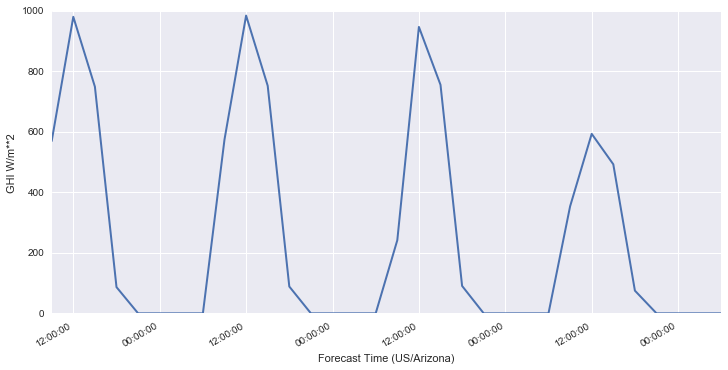

In [21]:
data['ghi'].plot(linewidth=2, ls='-')
plt.ylabel('GHI W/m**2')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')

In [22]:
data

,temperature,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2016-04-03 09:00:00-07:00,7.249023,3.827341,569.712283,829.668309,92.683744,0.0,0.0,0.0,0.0
2016-04-03 12:00:00-07:00,3.680328,2.305870,980.540706,989.349943,100.748999,0.0,0.0,0.0,0.0
2016-04-03 15:00:00-07:00,15.852753,3.704706,749.436252,913.979997,97.013280,0.0,0.0,0.0,0.0
2016-04-03 18:00:00-07:00,34.172302,2.074841,86.669267,223.879685,52.436825,0.0,0.0,0.0,0.0
2016-04-03 21:00:00-07:00,37.600037,1.148434,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-04-04 00:00:00-07:00,30.440277,1.059563,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-04-04 03:00:00-07:00,15.279449,1.507930,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-04-04 06:00:00-07:00,10.932709,1.808350,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-04-04 09:00:00-07:00,8.408173,2.475026,574.824061,832.516507,92.832874,0.0,0.0,0.0,0.0
2016-04-04 12:00:00-07:00,6.298248,2.828518,984.610605,990.448411,100.802616,0.0,0.0,0.0,0.0


## NDFD

In [23]:
fm = NDFD()

In [24]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

In [25]:
total_cloud_cover = data['total_clouds']
temp = data['temperature']
wind = data['wind_speed']

(0, 100)

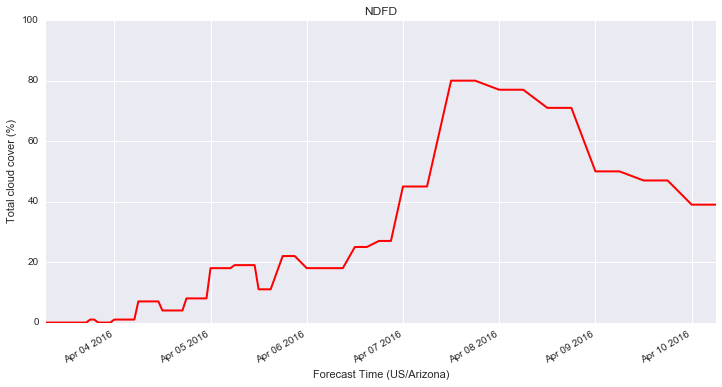

In [26]:
total_cloud_cover.plot(color='r', linewidth=2)
plt.ylabel('Total cloud cover' + ' (%s)' % fm.units['total_clouds'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('NDFD')
plt.ylim(0,100)

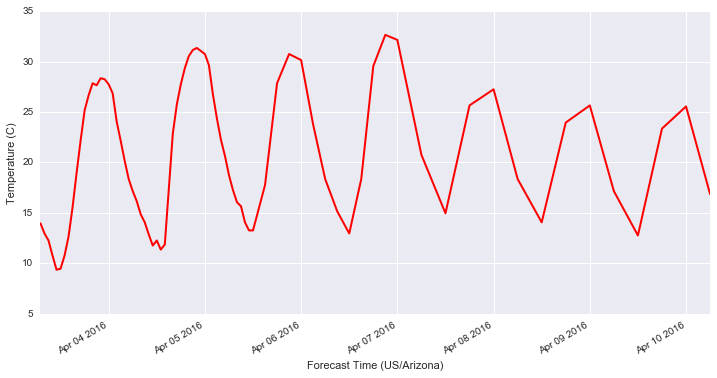

In [27]:
temp.plot(color='r', linewidth=2)
plt.ylabel('Temperature' + ' (%s)' % fm.units['temperature'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')    

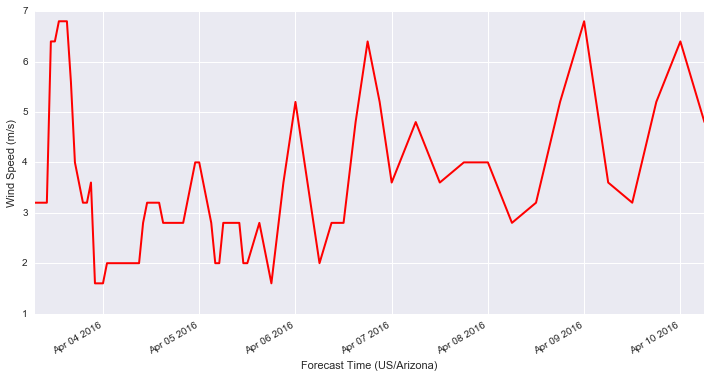

In [28]:
wind.plot(color='r', linewidth=2)
plt.ylabel('Wind Speed' + ' (%s)' % fm.units['wind_speed'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')   

In [29]:
data

,temperature,wind_speed,ghi,dni,dhi,total_clouds
2016-04-03 07:00:00-07:00,13.950012,3.2,106.189110,278.487427,57.312551,0.0
2016-04-03 08:00:00-07:00,12.950012,3.2,334.661071,651.734481,82.893092,0.0
2016-04-03 09:00:00-07:00,12.250000,3.2,569.712283,829.668309,92.683744,0.0
2016-04-03 10:00:00-07:00,10.750000,3.2,768.177123,921.228009,97.377713,0.0
2016-04-03 11:00:00-07:00,9.350006,6.4,909.195203,968.970216,99.750194,0.0
2016-04-03 12:00:00-07:00,9.450012,6.4,980.540706,989.349943,100.748999,0.0
2016-04-03 13:00:00-07:00,10.750000,6.8,976.446778,988.238362,100.694720,0.0
2016-04-03 14:00:00-07:00,12.649994,6.8,897.257250,965.338091,99.571346,0.0
2016-04-03 15:00:00-07:00,15.550018,6.8,749.436252,913.979997,97.013280,0.0
2016-04-03 16:00:00-07:00,18.950012,5.6,545.990447,816.024490,91.966405,0.0


## RAP

In [30]:
fm = RAP(resolution=20)

In [31]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

In [32]:
cloud_vars = ['total_clouds', 'high_clouds', 'mid_clouds', 'low_clouds']

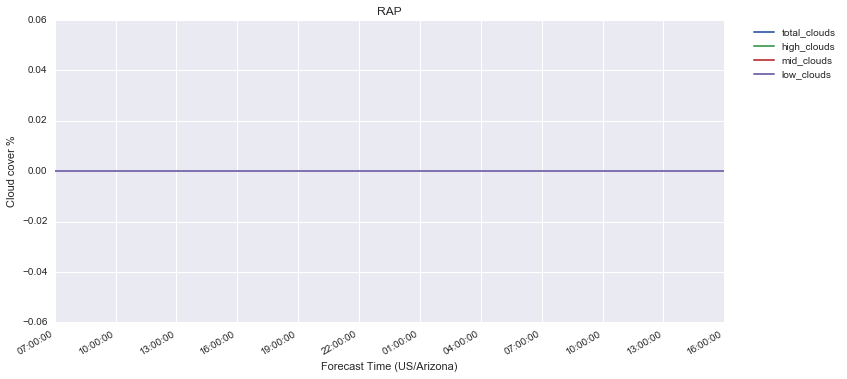

In [33]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('RAP')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [34]:
data

,temperature,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2016-04-03 07:00:00-07:00,14.254150,3.840898,106.189110,278.487427,57.312551,0.0,0.0,0.0,0.0
2016-04-03 08:00:00-07:00,13.241058,3.722868,334.661071,651.734481,82.893092,0.0,0.0,0.0,0.0
2016-04-03 09:00:00-07:00,12.518677,3.776808,569.712283,829.668309,92.683744,0.0,0.0,0.0,0.0
2016-04-03 10:00:00-07:00,11.690033,3.539163,768.177123,921.228009,97.377713,0.0,0.0,0.0,0.0
2016-04-03 11:00:00-07:00,11.030701,3.530295,909.195203,968.970216,99.750194,0.0,0.0,0.0,0.0
2016-04-03 12:00:00-07:00,10.536224,3.573894,980.540706,989.349943,100.748999,0.0,0.0,0.0,0.0
2016-04-03 13:00:00-07:00,10.257965,3.649565,976.446778,988.238362,100.694720,0.0,0.0,0.0,0.0
2016-04-03 14:00:00-07:00,12.905792,3.865550,897.257250,965.338091,99.571346,0.0,0.0,0.0,0.0
2016-04-03 15:00:00-07:00,19.228241,5.671968,749.436252,913.979997,97.013280,0.0,0.0,0.0,0.0
2016-04-03 16:00:00-07:00,25.426422,5.948405,545.990447,816.024490,91.966405,0.0,0.0,0.0,0.0


## HRRR

In [35]:
fm = HRRR()

In [36]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

In [37]:
cloud_vars = ['total_clouds', 'high_clouds', 'mid_clouds', 'low_clouds']

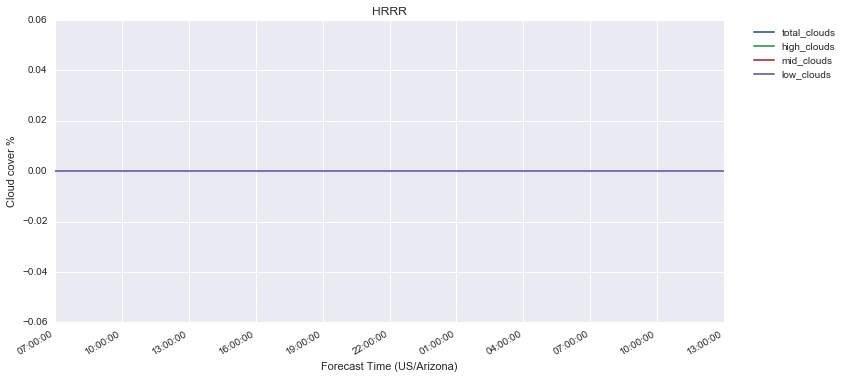

In [38]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time (' + str(data.index.tz) + ')')
plt.title('HRRR')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [39]:
data

,temperature,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2016-04-03 07:00:00-07:00,13.690399,3.379238,106.189110,278.487427,57.312551,0.0,0.0,0.0,0.0
2016-04-03 08:00:00-07:00,12.653381,3.755251,334.661071,651.734481,82.893092,0.0,0.0,0.0,0.0
2016-04-03 09:00:00-07:00,11.970886,3.924942,569.712283,829.668309,92.683744,0.0,0.0,0.0,0.0
2016-04-03 10:00:00-07:00,11.585083,3.541783,768.177123,921.228009,97.377713,0.0,0.0,0.0,0.0
2016-04-03 11:00:00-07:00,10.881439,3.525367,909.195203,968.970216,99.750194,0.0,0.0,0.0,0.0
2016-04-03 12:00:00-07:00,10.985199,3.425176,980.540706,989.349943,100.748999,0.0,0.0,0.0,0.0
2016-04-03 13:00:00-07:00,10.914856,3.475241,976.446778,988.238362,100.694720,0.0,0.0,0.0,0.0
2016-04-03 14:00:00-07:00,11.162567,2.863182,897.257250,965.338091,99.571346,0.0,0.0,0.0,0.0
2016-04-03 15:00:00-07:00,13.194580,4.317441,749.436252,913.979997,97.013280,0.0,0.0,0.0,0.0
2016-04-03 16:00:00-07:00,17.478760,5.788805,545.990447,816.024490,91.966405,0.0,0.0,0.0,0.0


## HRRR (ESRL)

In [40]:
fm = HRRR_ESRL()

/Users/holmgren/git_repos/pvlibfx/pvlib-python/pvlib/forecast.py:572: UserWarning: HRRR_ESRL is an experimental model and is not always available.
  warnings.warn('HRRR_ESRL is an experimental model and is not always available.')


ParseError: syntax error: line 1, column 0

In [ ]:
# retrieve data
data = fm.get_query_data(latitude, longitude, start, end)

In [ ]:
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

In [ ]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('HRRR_ESRL')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [ ]:
data['ghi'].plot(linewidth=2, ls='-')
plt.ylabel('GHI W/m**2')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')

## Quick power calculation

In [41]:
from pvlib.pvsystem import PVSystem, retrieve_sam
from pvlib.modelchain import ModelChain

sandia_modules = retrieve_sam(name='SandiaMod')
sapm_inverters = retrieve_sam('sandiainverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208_208V__CEC_2014_']

system = PVSystem(module_parameters=module,
                  inverter_parameters=inverter)

# fx is a common abbreviation for forecast
fx_model = GFS()
fx_data = fx_model.get_processed_data(latitude, longitude, start, end)

# use a ModelChain object to calculate modeling intermediates
mc = ModelChain(system, fx_model.location,
                orientation_strategy='south_at_latitude_tilt')

# extract relevant data for model chain
irradiance = fx_data[['ghi', 'dni', 'dhi']]
weather = fx_data[['wind_speed', 'temperature']].rename(
    columns={'temperature':'temp_air'})
mc.run_model(fx_data.index, irradiance=irradiance, weather=weather)

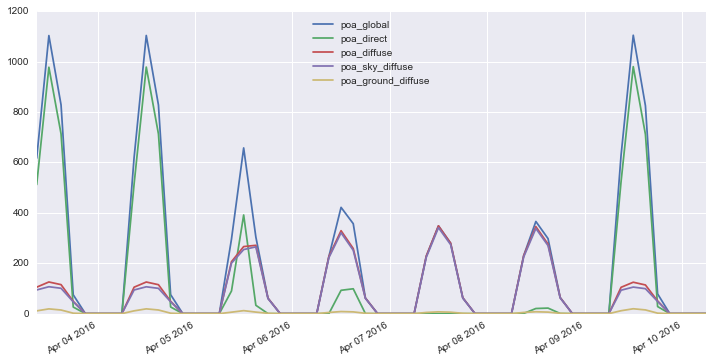

In [42]:
mc.total_irrad.plot()

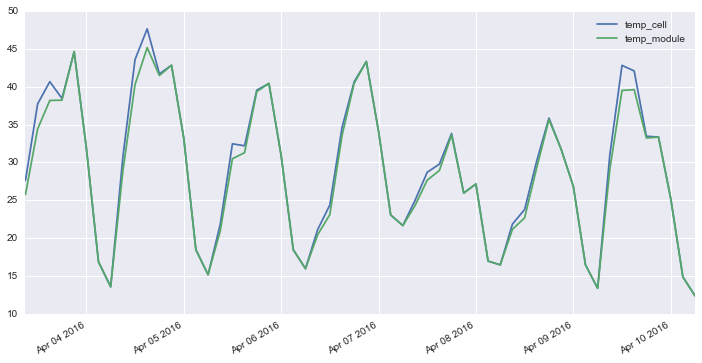

In [43]:
mc.temps.plot()

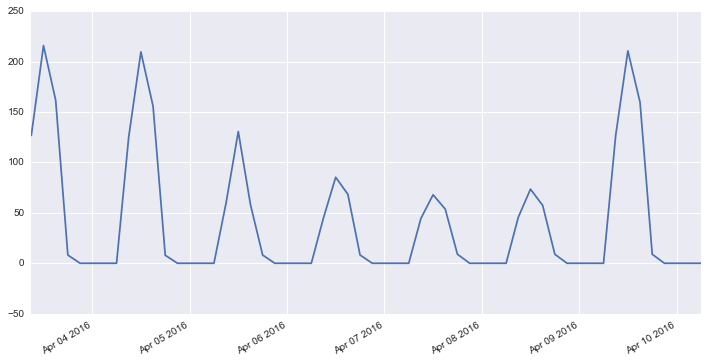

In [44]:
mc.ac.plot()